### Lab Task: Normalization vs Denormalization  
#### To Do Steps:
1. Create a Database to store the results of students (Name what you think is appropriate)
2. Create tables that can store the following information (You have to figure out how many tables are needed so that database can be in 3rd normal form, you can also store additional information (for example related to students, instructor,s etc))

<ul><li>Student Roll Number</li>
<li>Student Name</li>
<li>Enrolled Course (Each student can have multiple courses)</li>
<li>Instructor Name</li>
<li>Institution (E.g ITU)</li>
<li>Campus</li>
<li>Department Name (Computer Science)</li>
<li>Semester (E.g Spring 2022)</li>
<li>Class/Sections/Batch (E.g MSCS)</li>
<li>Session (E.g 2020)</li>
<li>Percentage of Marks Obtained By Students in Each Enrolled Course</li>
<li>Grade Obtained By Students in Each Enrolled Course</li>
<li>GPA Obtained By Students in Each Enrolled Course</li>
<li>If a student is Fresh or Repeating the Course</li></ul>

3. Now insert data in all tables sufficient enough to perform different operations 
4. There should be data of at least 10 students and for each student, there should be records for 5 courses including a repetition 
5. The databases you created must be in 3rd normal form 
6. You can use dummy data but it must be realistic (Do not use random numbers or unrealistic data)

7. Now you have to create a denormalized table to explore following insights from data
<ul><li>Display semester wise students in a sorted way. For example all students in Spring 2022 sorted on the basis of percentages they obtained.</li>
<li>Display only students that are enrolled in specific semester.</li>
<li>Display only students that are enrolled in specific course.</li>
<li>Students having grade 'A' in a specific course in a given semester. (For example I want to see who scored 'A' in Deep Learning)</li>
<li>Students who are repeating specific course in a given semester.</li>
<li>Total Number of students who are repeating specific course in a given semester.</li>
<li>In which course a student obtained maximum or minimum percentange.</li>
<li>Calculate the CGPA of each student using the data you created.</li>
<li>Overall performance of course instructor.</li></ul>

8. Bonus but optional tasks 
<ul><li>Show the time difference between a query on normalized tables (using joins) and denormalized table.</li>
<li>Show the entity relation diagram (paste image in same notebook).</li></ul>

9. This task is graded and will affect the final grade of the course 
10. Plagiarism is strictly not allowed and zero grade will be awarded to such cases in the task and can have further consequences 



## Step 1 to 6
Creating database, tables and inserting data

### Creating database

In [1]:
import psycopg2
import pandas as pd
import time

In [2]:
# Create a connection
try: 
    conn = psycopg2.connect("host=127.0.0.1 user=postgres password=ali123ali")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
# get a cursor    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
    
# set the autocommit to true    
conn.set_session(autocommit=True)

try: 
    cur.execute("create database university")
except psycopg2.Error as e:
    print(e)

database "university" already exists



### Creating Tables (in 3NF)

In [3]:
# Create a connection
try: 
    conn = psycopg2.connect("host=127.0.0.1 dbname=university user=postgres password=ali123ali")
except psycopg2.Error as e: 
    print("Error: Could not make connection to the Postgres database")
    print(e)
    
# get a cursor    
try: 
    cur = conn.cursor()
except psycopg2.Error as e: 
    print("Error: Could not get curser to the Database")
    print(e)
    
# set the autocommit to true    
conn.set_session(autocommit=True)

In [4]:
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS student (S_rn int, S_name varchar, S_class varchar,\
                                                        S_session int, PRIMARY KEY(S_rn));""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [5]:
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS instructor (I_id int, I_name varchar, I_institute varchar, \
                                                        I_campus varchar, I_department varchar, PRIMARY KEY(I_id));""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [6]:
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS course (C_id int, C_name varchar, I_id int, PRIMARY KEY(C_id),\
                                                    CONSTRAINT fk_instructor FOREIGN KEY (I_id) REFERENCES instructor(I_id));""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [7]:
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS course_student (S_rn int, C_id int, percentage int, grade varchar,  \
                                                        GPA float, status varchar, semester varchar, \
                                                        PRIMARY KEY(S_rn,C_id,status),
                                                        CONSTRAINT fk_student FOREIGN KEY (S_rn) REFERENCES student(S_rn), 
                                                        CONSTRAINT fk_course  FOREIGN KEY (C_id) REFERENCES course(C_id));""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

### Inserting data 

In [8]:
query = "INSERT INTO student (S_rn , S_name , S_class ,S_session) VALUES (%s, %s, %s, %s)"
data = [(1,"ali",'MSCS',2021),
        (2,"omer",'MSCS',2022),
        (3,"usman",'MSCS',2021),
        (4,"naila",'MSCS',2022),
        (5,"maisum",'MSCS',2021),
        (6,"tajallah",'MSDS',2022),
        (7,"maria",'MSDS',2021),
        (8,"marium",'MSDS',2022),
        (9,"usama",'MSDS',2021),
        (10,"mustafa",'MSDS',2022)]

try:
    cur.executemany(query,data)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

In [9]:
query = 'SELECT * from student;'
students = pd.read_sql_query(query,conn)
display(students)

,s_rn,s_name,s_class,s_session
0,1,ali,MSCS,2021
1,2,omer,MSCS,2022
2,3,usman,MSCS,2021
3,4,naila,MSCS,2022
4,5,maisum,MSCS,2021
5,6,tajallah,MSDS,2022
6,7,maria,MSDS,2021
7,8,marium,MSDS,2022
8,9,usama,MSDS,2021
9,10,mustafa,MSDS,2022


In [10]:
query = "INSERT INTO instructor(I_id, I_name, I_institute, I_campus, I_department) VALUES (%s, %s, %s, %s, %s)"
data = [(11,"Dr Mohsin", 'ITU','Arfa tower','CS'),
        (22,"Dr Arif", 'ITU','Arfa tower','CS'),
        (33,"Dr Faisal K", 'ITU','Arfa tower','DS'),
        (44,"Dr iqra", 'ITU','Arfa tower','DS'),
        (55,"Dr Faisal B", 'ITU','Arfa tower','CS')]

try:
    cur.executemany(query,data)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

In [11]:
query = 'SELECT * from instructor;'
instructors = pd.read_sql_query(query,conn)
display(instructors)

,i_id,i_name,i_institute,i_campus,i_department
0,11,Dr Mohsin,ITU,Arfa tower,CS
1,22,Dr Arif,ITU,Arfa tower,CS
2,33,Dr Faisal K,ITU,Arfa tower,DS
3,44,Dr iqra,ITU,Arfa tower,DS
4,55,Dr Faisal B,ITU,Arfa tower,CS


In [12]:
query = "INSERT INTO course (C_id , C_name , I_id ) VALUES (%s, %s, %s)"
data = [(111,"Deep Learning",11),
        (222,"Machine Learning",22),
        (333,"Big Data",33),
        (444,"Text Mining",44),
        (555,"Data Science",33),
        (666,"Statistical Analysis",55)]

try:
    cur.executemany(query,data)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

In [13]:
query = 'SELECT * from course;'
courses = pd.read_sql_query(query,conn)
display(courses)

,c_id,c_name,i_id
0,111,Deep Learning,11
1,222,Machine Learning,22
2,333,Big Data,33
3,444,Text Mining,44
4,555,Data Science,33
5,666,Statistical Analysis,55


In [14]:
query = "INSERT INTO course_student (S_rn, C_id, percentage, grade, GPA , status, semester) VALUES (%s, %s, %s, %s, %s,%s, %s)"
data = [(1,111,60,'B',3.0,'Fresh', 'fall 2021'),
        (1,222,80,'B',3.3,'Fresh', 'spring 2022'),
        (1,111,95,'A',4,'repeating', 'spring 2022'),
        (1,444,76,'B',3.3,'Fresh', 'spring 2022'),
        (1,555,99,'A',3.7,'Fresh', 'fall 2021'),
        
        (2,111,95,'A',3.9,'Fresh', 'spring 2022'),
        (2,222,73,'B',2.9,'Fresh', 'fall 2021'),
        (2,222,90,'A',3.7,'repeating', 'spring 2022'),
        (2,444,77,'B',3.3,'Fresh', 'fall 2021'),
        (2,666,89,'A',4,'repeating', 'spring 2022'),
        
        (3,111,97,'A',4,'Fresh', 'fall 2021'),
        (3,222,71,'B',3.1,'repeating', 'spring 2022'),
        (3,333,91,'A',3.6,'repeating', 'spring 2022'),
        (3,333,72,'B',2.9,'Fresh', 'fall 2021'),
        (3,666,93,'A',4,'repeating', 'fall 2021'),
        
        (4,111,94,'A',3.5,'Fresh', 'spring 2022'),
        (4,222,72,'B',2.7,'repeating', 'fall 2021'),
        (4,444,73,'B',3.0,'Fresh', 'fall 2021'),
        (4,444,99,'A',3.5,'repeating', 'Spring 2022'),
        (4,666,93,'A',3.9,'Fresh', 'spring 2022'),
        
        (5,111,92,'A',3.9,'Fresh', 'fall 2021'),
        (5,333,77,'B',3.1,'Fresh', 'spring 2022'),
        (5,444,97,'A',3.3,'Fresh', 'fall 2021'),
        (5,555,79,'B',3.1,'Fresh', 'fall 20221'),
        (5,555,94,'A',3.9,'repeating', 'spring 2022'),
        
        (6,111,91,'A',4,'Fresh', 'spring 2022'),
        (6,222,78,'B',3.8,'Fresh', 'fall 2021'),
        (6,333,90,'A',3.1,'repeating', 'spring 2022'),
        (6,444,75,'B',3.5,'Fresh', 'fall 2021'),
        (6,555,96,'A',3.5,'Fresh', 'spring 2022'),
        
        (7,111,98,'A',3.6,'Fresh', 'fall 2021'),
        (7,222,73,'B',3.7,'Fresh', 'spring 2022'),
        (7,333,93,'A',3.9,'repeating', 'fall 2021'),
        (7,444,76,'B',3.1,'Fresh', 'spring 2022'),
        (7,666,96,'A',3.9,'repeating', 'fall 2021'),
        
        (8,111,95,'A',3.6,'Fresh', 'spring 2022'),
        (8,222,79,'B',3.9,'repeating', 'fall 2021'),
        (8,333,91,'A',4,'repeating', 'spring 2022'),
        (8,555,79,'B',3.1,'Fresh', 'fall 2021'),
        (8,666,91,'A',3.7,'repeating', 'spring 2022'),
        
        (9,111,90,'A',3.0,'Fresh', 'fall 2021'),
        (9,222,79,'B',3.0,'repeating', 'spring 2022'),
        (9,444,93,'A',3.12,'Fresh', 'fall 2021'),
        (9,555,74,'B',3.33,'Fresh', 'spring 2022'),
        (9,666,90,'A',3.99,'repeating', 'fall 2021'),
        
        (10,111,91,'A',3.77,'Fresh', 'spring 2022'),
        (10,333,78,'B',3.45,'Fresh', 'fall 2021'),
        (10,444,98,'A',3.67,'Fresh', 'spring 2022'),
        (10,555,78,'B',3.34,'Fresh', 'fall 2021'),
        (10,666,98,'A',3.98,'repeating', 'spring 2022'),
        ]

try:
    cur.executemany(query,data)
except psycopg2.Error as e: 
    print("Error: Inserting Rows")
    print (e)

In [15]:
query = 'SELECT * from course_student;'
course_student = pd.read_sql_query(query,conn)
display(course_student)

,s_rn,c_id,percentage,grade,gpa,status,semester
0,1,111,60,B,3.00,Fresh,fall 2021
1,1,222,80,B,3.30,Fresh,spring 2022
2,1,111,95,A,4.00,repeating,spring 2022
3,1,444,76,B,3.30,Fresh,spring 2022
4,1,555,99,A,3.70,Fresh,fall 2021
5,2,111,95,A,3.90,Fresh,spring 2022
6,2,222,73,B,2.90,Fresh,fall 2021
7,2,222,90,A,3.70,repeating,spring 2022
8,2,444,77,B,3.30,Fresh,fall 2021
9,2,666,89,A,4.00,repeating,spring 2022


## Step 7 + Bonus task 1 (time difference)

### <font color = blue>1- Display semester wise students in a sorted way. For example all students in Spring 2022 sorted on the basis of percentages they obtained</font>

#### Denormalized

In [16]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query1 as 
                    select *
                    from course_student JOIN student using(S_rn);""")
    
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [17]:
# denormalized 
query = "SELECT s_rn, avg(percentage) as percentage \
        from query1 \
        where semester = 'fall 2021' \
        group by s_rn \
        order by avg(percentage);"

t = time.time()
query1 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query1)

Time Taken: 0.023827552795410156


,s_rn,percentage
0,4,72.500000
1,2,75.000000
2,6,76.500000
3,10,78.000000
4,8,79.000000
5,1,79.500000
6,3,87.333333
7,9,91.000000
8,5,94.500000
9,7,95.666667


#### Normalized

In [18]:
# Normalized 
query = "SELECT student.s_rn, avg(percentage) as percentage \
        from course_student JOIN student ON student.S_rn = course_student.S_rn \
        where semester = 'fall 2021' \
        group by student.s_rn \
        order by avg(percentage);"

t = time.time()
query1 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query1)

Time Taken: 0.0062596797943115234


,s_rn,percentage
0,4,72.500000
1,2,75.000000
2,6,76.500000
3,10,78.000000
4,8,79.000000
5,1,79.500000
6,3,87.333333
7,9,91.000000
8,5,94.500000
9,7,95.666667


### <font color = blue>2- Display only students that are enrolled in specific semester.</font>

#### Denormalized 

In [19]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query2 as 
                    select *
                    from course_student JOIN student using(S_rn);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [20]:
# denormalized 
query = "SELECT s_rn , max(s_name) as name, max(s_class) as class, max(s_session) as session \
        from query2 \
        where semester = 'fall 2021' \
        group by s_rn;"

t = time.time()
query2 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query2)

Time Taken: 0.010982275009155273


,s_rn,name,class,session
0,1,ali,MSCS,2021
1,2,omer,MSCS,2022
2,3,usman,MSCS,2021
3,4,naila,MSCS,2022
4,5,maisum,MSCS,2021
5,6,tajallah,MSDS,2022
6,7,maria,MSDS,2021
7,8,marium,MSDS,2022
8,9,usama,MSDS,2021
9,10,mustafa,MSDS,2022


#### Normalized

In [21]:
# Normalized 
query = "SELECT student.s_rn, avg(percentage) as percentage \
        from course_student JOIN student ON student.S_rn = course_student.S_rn \
        where semester = 'fall 2021' \
        group by student.s_rn \
        order by avg(percentage);"

t = time.time()
query2 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query2)

Time Taken: 0.004675388336181641


,s_rn,percentage
0,4,72.500000
1,2,75.000000
2,6,76.500000
3,10,78.000000
4,8,79.000000
5,1,79.500000
6,3,87.333333
7,9,91.000000
8,5,94.500000
9,7,95.666667


### <font color = blue>3- Display only students that are enrolled in specific course.</font>

#### Denormalized

In [22]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query3 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [23]:
# denormalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester \
        from query3 \
        where c_name  = 'Machine Learning';"
#query = "select * from query3"
t = time.time()
query3 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query3)

Time Taken: 0.002411365509033203


,s_rn,s_name,s_class,s_session,semester
0,1,ali,MSCS,2021,spring 2022
1,2,omer,MSCS,2022,fall 2021
2,2,omer,MSCS,2022,spring 2022
3,3,usman,MSCS,2021,spring 2022
4,4,naila,MSCS,2022,fall 2021
5,6,tajallah,MSDS,2022,fall 2021
6,7,maria,MSDS,2021,spring 2022
7,8,marium,MSDS,2022,fall 2021
8,9,usama,MSDS,2021,spring 2022


#### Normalized

In [24]:
# Normalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester\
        from course_student JOIN student using(S_rn) JOIN course using(C_id) \
        where c_name = 'Machine Learning';"

t = time.time()
query3 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query3)

Time Taken: 0.009136199951171875


,s_rn,s_name,s_class,s_session,semester
0,1,ali,MSCS,2021,spring 2022
1,2,omer,MSCS,2022,fall 2021
2,2,omer,MSCS,2022,spring 2022
3,3,usman,MSCS,2021,spring 2022
4,4,naila,MSCS,2022,fall 2021
5,6,tajallah,MSDS,2022,fall 2021
6,7,maria,MSDS,2021,spring 2022
7,8,marium,MSDS,2022,fall 2021
8,9,usama,MSDS,2021,spring 2022


###  <font color = blue> 4- Students having grade 'A' in a specific course in a given semester. (For example I want to see who scored 'A' in Deep Learning)</font>

#### Denormalized

In [25]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query4 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [26]:
# denormalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester, grade, c_name \
        from query4 \
        where c_name  = 'Deep Learning' and semester = 'fall 2021' and grade = 'A';"
#query = "select * from query3"
t = time.time()
query4 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query4)

Time Taken: 0.009607553482055664


,s_rn,s_name,s_class,s_session,semester,grade,c_name
0,3,usman,MSCS,2021,fall 2021,A,Deep Learning
1,5,maisum,MSCS,2021,fall 2021,A,Deep Learning
2,7,maria,MSDS,2021,fall 2021,A,Deep Learning
3,9,usama,MSDS,2021,fall 2021,A,Deep Learning


#### Normalized

In [27]:
# Normalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester, grade, c_name \
        from course_student JOIN student using(S_rn) JOIN course using(C_id) \
        where c_name = 'Deep Learning' and semester = 'fall 2021' and grade = 'A';"

t = time.time()
query4 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query4)

Time Taken: 0.016083478927612305


,s_rn,s_name,s_class,s_session,semester,grade,c_name
0,3,usman,MSCS,2021,fall 2021,A,Deep Learning
1,5,maisum,MSCS,2021,fall 2021,A,Deep Learning
2,7,maria,MSDS,2021,fall 2021,A,Deep Learning
3,9,usama,MSDS,2021,fall 2021,A,Deep Learning


### <font color = blue>5- Students who are repeating specific course in a given semester.</font>

#### Denormalized

In [28]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query5 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [29]:
# denormalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester, grade, c_name, status \
        from query5 \
        where c_name  = 'Machine Learning' and semester = 'fall 2021' and status = 'repeating';"
#query = "select * from query3"
t = time.time()
query5 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query5)

Time Taken: 0.01053476333618164


,s_rn,s_name,s_class,s_session,semester,grade,c_name,status
0,4,naila,MSCS,2022,fall 2021,B,Machine Learning,repeating
1,8,marium,MSDS,2022,fall 2021,B,Machine Learning,repeating


#### Normalized

In [30]:
# Normalized 
query = "SELECT s_rn , s_name, s_class, s_session, semester, grade, c_name \
        from course_student JOIN student using(S_rn) JOIN course using(C_id) \
        where c_name = 'Machine Learning' and semester = 'fall 2021' and status = 'repeating';"

t = time.time()
query5 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query5)

Time Taken: 0.01053929328918457


,s_rn,s_name,s_class,s_session,semester,grade,c_name
0,4,naila,MSCS,2022,fall 2021,B,Machine Learning
1,8,marium,MSDS,2022,fall 2021,B,Machine Learning


### <font color = blue>6- Total Number of students who are repeating specific course in a given semester.</font>

#### Denormalized

In [31]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query6 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [32]:
# denormalized 
query = "SELECT count(*) \
        from query6 \
        where c_name  = 'Machine Learning' and semester = 'fall 2021' and status = 'repeating';"
#query = "select * from query3"
t = time.time()
query6 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query6)

Time Taken: 0.01090860366821289


,count
0,2


#### Normalized

In [33]:
# Normalized 
query = "SELECT count(*) \
        from course_student JOIN student using(S_rn) JOIN course using(C_id) \
        where c_name = 'Machine Learning' and semester = 'fall 2021' and status = 'repeating';"

t = time.time()
query6 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query6)

Time Taken: 0.0028541088104248047


,count
0,2


###  <font color = blue> 7- In which course a student obtained maximum or minimum percentange. </font>

#### Denormalized

In [34]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query7 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [35]:
# denormalized (for maximum)
query = "Select a.s_rn, a.c_id, a.c_name, a.percentage \
        from query7 as a join (SELECT s_rn, max(percentage) as percentage  \
                              from query7 as b \
                              group by s_rn) as b on a.s_rn = b.s_rn and a.percentage = b.percentage;"
#query = "select * from query3"
t = time.time()
query7 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query7)

Time Taken: 0.0072557926177978516


,s_rn,c_id,c_name,percentage
0,1,555,Data Science,99
1,2,111,Deep Learning,95
2,3,111,Deep Learning,97
3,4,444,Text Mining,99
4,5,444,Text Mining,97
5,6,555,Data Science,96
6,7,111,Deep Learning,98
7,8,111,Deep Learning,95
8,9,444,Text Mining,93
9,10,444,Text Mining,98


#### Normalized

In [36]:
# Normalized (for maximum)
query = "SELECT a.s_rn, a.c_id, a.c_name, a.percentage \
        from (course_student JOIN student using(S_rn) JOIN course using(C_id)) as a \
        join (SELECT s_rn, max(percentage) as percentage  \
            from query7 as b \
            group by s_rn) as b on a.s_rn = b.s_rn and a.percentage = b.percentage;"

t = time.time()
query6 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query6)

Time Taken: 0.008103609085083008


,s_rn,c_id,c_name,percentage
0,1,555,Data Science,99
1,2,111,Deep Learning,95
2,3,111,Deep Learning,97
3,4,444,Text Mining,99
4,5,444,Text Mining,97
5,6,555,Data Science,96
6,7,111,Deep Learning,98
7,8,111,Deep Learning,95
8,9,444,Text Mining,93
9,10,444,Text Mining,98


### <font color = blue>8- Calculate the CGPA of each student using the data you created.</font>

#### Denormalized

In [37]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query8 as 
                    select *
                    from course_student JOIN student using(S_rn) JOIN course using(C_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [38]:
# denormalized 
query = "SELECT s_rn , avg(GPA) as CGPA \
        from query8 \
        group by s_rn \
        order by s_rn;"
#query = "select * from query3"
t = time.time()
query8 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query8)

Time Taken: 0.007161140441894531


,s_rn,cgpa
0,1,3.460
1,2,3.560
2,3,3.520
3,4,3.320
4,5,3.460
5,6,3.580
6,7,3.640
7,8,3.660
8,9,3.288
9,10,3.642


#### Normalized

In [39]:
# Normalized 
query = "SELECT s_rn, avg(gpa) as CGPA \
        from course_student JOIN student using(S_rn) JOIN course using(C_id) \
        group by s_rn \
        order by s_rn;"

t = time.time()
query6 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query6)

Time Taken: 0.009382963180541992


,s_rn,cgpa
0,1,3.460
1,2,3.560
2,3,3.520
3,4,3.320
4,5,3.460
5,6,3.580
6,7,3.640
7,8,3.660
8,9,3.288
9,10,3.642


### <font color = blue>9- Overall performance of course instructor.</font>

#### Denormalized

In [40]:
# creating denormalized table
try: 
    cur.execute("""CREATE TABLE IF NOT EXISTS query9 as 
                    select *
                    from course_student JOIN course using(C_id) JOIN instructor using (i_id);""")
except psycopg2.Error as e: 
    print("Error: Issue creating table")
    print (e)

In [41]:
# denormalized 
query = "SELECT i_name, avg(gpa) as performance \
        from query9 \
        group by i_name;"
#query = "select * from query3"
t = time.time()
query9 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query9)

Time Taken: 0.010500669479370117


,i_name,performance
0,Dr Mohsin,3.660909
1,Dr Faisal B,3.924286
2,Dr iqra,3.310000
3,Dr Arif,3.344444
4,Dr Faisal K,3.430000


#### Normalized

In [42]:
# Normalized 
query = "SELECT i_name , avg(gpa) as cgpa \
        from course_student JOIN course using(C_id) join instructor using (i_id)\
        group by i_name;"

t = time.time()
query9 = pd.read_sql_query(query,conn)
print('Time Taken:',time.time()-t)
display(query9)

Time Taken: 0.0085296630859375


,i_name,cgpa
0,Dr Mohsin,3.660909
1,Dr Faisal B,3.924286
2,Dr iqra,3.310000
3,Dr Arif,3.344444
4,Dr Faisal K,3.430000


# Bounous Task 2 ( Entity Relation Diagram (ERD))

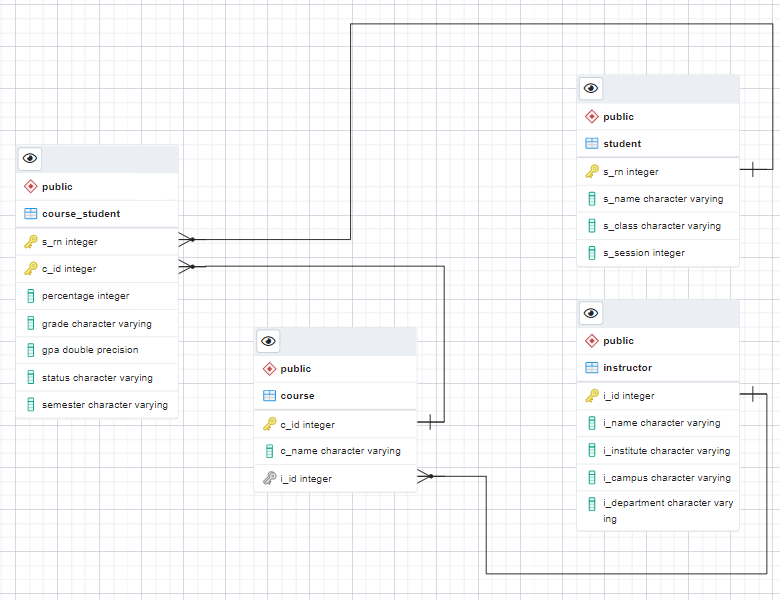

# Droping all the tables abd clossing connection

In [43]:
try: 
    cur.execute("DROP table IF EXISTS student CASCADE")
    cur.execute("DROP table IF EXISTS course CASCADE")
    cur.execute("DROP table IF EXISTS instructor CASCADE")
    cur.execute("DROP table IF EXISTS course_student CASCADE")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

In [44]:
try: 
    cur.execute("DROP table IF EXISTS query1 CASCADE")
    cur.execute("DROP table IF EXISTS query2 CASCADE")
    cur.execute("DROP table IF EXISTS query3 CASCADE")
    cur.execute("DROP table IF EXISTS query4 CASCADE")
    cur.execute("DROP table IF EXISTS query5 CASCADE")
    cur.execute("DROP table IF EXISTS query6 CASCADE")
    cur.execute("DROP table IF EXISTS query7 CASCADE")
    cur.execute("DROP table IF EXISTS query8 CASCADE")
    cur.execute("DROP table IF EXISTS query9 CASCADE")
except psycopg2.Error as e: 
    print("Error: Dropping table")
    print (e)

In [45]:
cur.close()
conn.close()